In [35]:
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error


In [55]:
D_X, D_y = np.loadtxt("train.dat", usecols=(0,1), unpack=True)
X = D_X.reshape(-1,1)
y = D_y
x_scale = (X - np.mean(X))/np.std(X)
poly = PolynomialFeatures(degree=4)
X_trans = poly.fit_transform(x_scale)

Fold 1: RMSE = 0.43439
Fold 2: RMSE = 0.38085
Fold 3: RMSE = 0.38574
Fold 4: RMSE = 0.45318
Fold 5: RMSE = 0.85900
Fold 6: RMSE = 0.44773
Mean RMSE = 0.49348


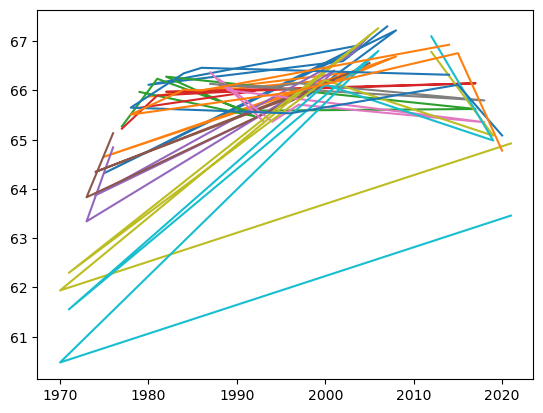

In [56]:

n_folds = 6
ridge = Ridge(alpha=0,fit_intercept=False,solver='cholesky')
cv_method = KFold(n_splits=n_folds, shuffle=False, random_state=None)
rmse_scores = np.zeros(n_folds)
for i, (train_idx, test_idx) in enumerate(cv_method.split(X_trans, y)):

    X_train, y_train = X_trans[train_idx], y[train_idx]
    X_test, y_test = X_trans[test_idx], y[test_idx]
    x_test = X[test_idx]

    ridge.fit(X_train, y_train)
    

    y_pred = ridge.predict(X_test)
    
    plt.plot(x_test, y_test)
    plt.plot(x_test, y_pred)
    rmse_scores[i] = np.sqrt(mean_squared_error(y_test, y_pred))
    
    #print(train_idx, test_idx)

    print("Fold {}: RMSE = {:.5f}".format(i+1, rmse_scores[i]))


print("Mean RMSE = {:.5f}".format(rmse_scores.mean()))